# Motif marginal effect in the chromosome Y

**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


**Check input file**

In [3]:
fdiry = file.path(FD_RES, "annotation_fragment", "filter_motif_score095")
fname = "chrY.bed.gz"
fglob = file.path(fdiry, "*", fname)
system(paste("ls", fglob), intern = TRUE)

[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input1_20x/chrY.bed.gz"
 [2] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input1/chrY.bed.gz"    
 [3] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input2_20x/chrY.bed.gz"
 [4] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input2/chrY.bed.gz"    
 [5] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input3_20x/chrY.bed.gz"
 [6] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input3/chrY.bed.gz"    
 [7] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input4_20x/chrY.bed.gz"
 [8] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input4/chrY.bed.gz"    
 [9] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input5_20x/chrY.bed.gz"
[10] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input5/chrY.bed.gz"    
[11] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX2_Dex/chrY.bed.gz"  
[12] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX2_DMSO/chrY.bed.gz" 
[13] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX3_Dex/chrY.bed.gz"  
[14] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX3_DMSO/chrY.bed.gz" 
[15] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX4_Dex/chrY.bed.gz"  
[16] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX4_DMSO/chrY.bed.gz" 
[17] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX5_Dex/chrY.bed.gz"  
[18] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/TFX5_DMSO/chrY.bed.gz"

## Import annotated fragment

In [4]:
### Get argument: Chromosome
CHROM = "chrY"

In [5]:
###################################################
# Import annotated fragments
###################################################

### set column names and types
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
cnames = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

### set samples
SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

### import bed files for each sample 
fdiry = file.path(FD_RES, "annotation_fragment", "filter_motif_score095")
fname = paste0(CHROM, ".bed.gz")

lst_dat = lapply(SAMPLES, function(sam){
    ### set path
    fpath = file.path(fdiry, sam, fname)
    print(fpath); flush.console()
    
    ### import data
    dat = read_tsv(fpath, col_types=ctypes, col_names=cnames) %>% mutate(Sample = sam)
    return(dat)
})

### arrange data
dat_ann_frag = bind_rows(lst_dat)

### check environment (before release variables)
print(mem_used())
lst_dat = NULL

### check environment (after release variables)
print(mem_used())

[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input1/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input2/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input3/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input4/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input5/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input1_20x/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input2_20x/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input3_20x/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/filter_motif_score095/Input4_20x/chrY.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annota

## Import library size

In [6]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib %>% head(20)

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input
18666630,Input1,Input
347635732,Input2_20x,Input
20167924,Input2,Input
349994051,Input3_20x,Input
23280988,Input3,Input
413508358,Input4_20x,Input
19003938,Input4,Input
341110487,Input5_20x,Input


## Preprocess
* Filter: at least 10 fragments for a motif
* Filter: fully cover the motif

In [11]:
###################################################
# Preprocess
###################################################
cat("+++++ Preprocess +++++\n")

### Filter: fully cover the motif
dat = dat_ann_frag
dat = dat %>% 
    mutate(Length_MTF = End_MTF - Start_MTF) %>%
    mutate(Length_Dif = Length_MTF - Overlap)

cat("Filtering: fully cover the motif\n")
cat("    Before Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")
dat = dat %>% dplyr::filter(Length_Dif == 0)
cat("    After  Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")

### grouped by motif cluster and 
### split the annotated fragments into list
lst    = dat %>% group_by(Motif) %>% group_split
motifs = lapply(lst, function(x){unique(x$Motif)}) %>% unlist
names(lst) = motifs

### get the list
lst_frag = lapply(lst, function(dat){
    tmp = dat %>% 
        group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, Sample) %>%
        summarize(N_Motif = n(), .groups = 'drop')
    return(tmp)
})

### filter out motifs that have almost no/low fragment in total
THRESHOLD = 10
cat("Filtering: filter out motifs with low fragments\n")
cat("    Threshold:", THRESHOLD, "\n")
cat("    Before Filter:", "#Motif =", length(lst_frag), "\n")

lst = lst_frag
cnt = lapply(lst, function(dat){sum(dat$Count_Frag)})
lst = lst[cnt > 10]
lst_frag = lst

cat("    After  Filter:", "#Motif =", length(lst_frag), "\n")

+++++ Preprocess +++++
Filtering: fully cover the motif
    Before Filter: #Motif = 220 #Annot = 593724 
    After  Filter: #Motif = 220 #Annot = 551520 
Filtering: filter out motifs with low fragments
    Threshold: 10 
    Before Filter: #Motif = 220 
    After  Filter: #Motif = 194 


### EDA: Filter: fully cover the motif

In [18]:
dat = dat_ann_frag
dat = dat %>% 
    mutate(Length_MTF = End_MTF - Start_MTF) %>%
    mutate(Length_Dif = Length_MTF - Overlap)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1023 rows containing missing values (geom_bar).”


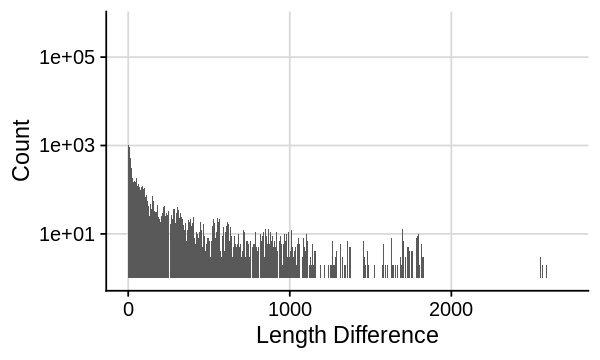

In [19]:
gpt = ggplot(dat, aes(x=Length_Dif)) + 
    geom_histogram(binwidth = 1) + 
    labs(x = "Length Difference", y = "Count") +
    scale_y_log10() +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

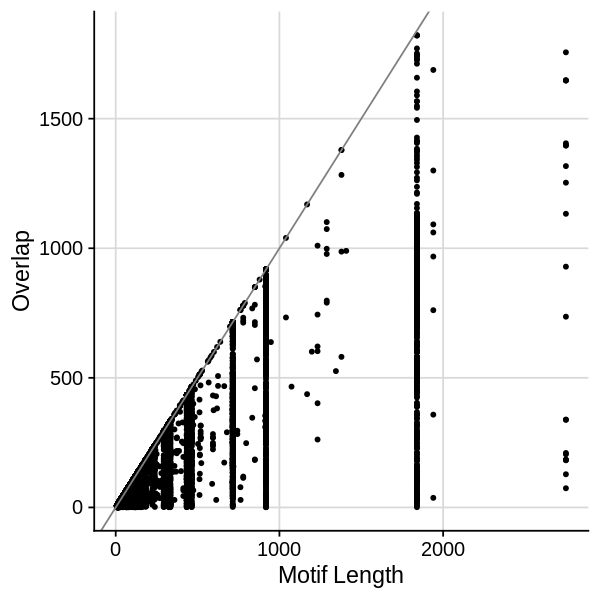

In [20]:
set.seed(123)
tmp = dat %>% dplyr::sample_n(100000)
gpt = ggplot(tmp, aes(x=Length_MTF, y=Overlap)) + 
    geom_point(size=1) + 
    geom_abline(slope = 1, intercept = 0, color="grey50") +
    labs(x = "Motif Length", y = "Overlap") +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

### EDA: filter motif with no fragment

In [12]:
summary(unlist(cnt))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00    40.75   570.50  2529.68  3390.25 47849.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



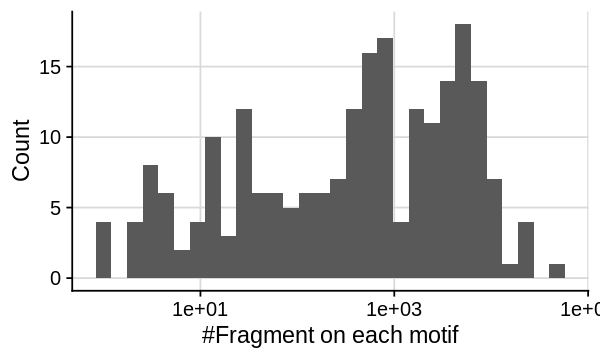

In [16]:
options(repr.plot.height=3, repr.plot.width=5)
qplot(x=unlist(cnt)) + 
    scale_x_log10() + 
    labs(x="#Fragment on each motif", y="Count") +
    theme_cowplot() + 
    background_grid()

## Cofounding factors

In [21]:
head(names(lst_frag))

[1] "AP1/1"      "AP1/2"      "BATF"       "BCL6/2"     "CCAAT/CEBP"
[6] "CENBP"

In [23]:
dat = lst_frag[["NR/20"]]
head(dat, 3)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,Sample,N_Motif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
chrY,4589108,4590120,1,NR/20,TFX2_Dex,1
chrY,5797445,5798466,1,NR/20,TFX3_Dex,1
chrY,5797578,5798454,1,NR/20,Input1_20x,1


In [24]:
table(dat$N_Motif)


  1   2 
114   8 

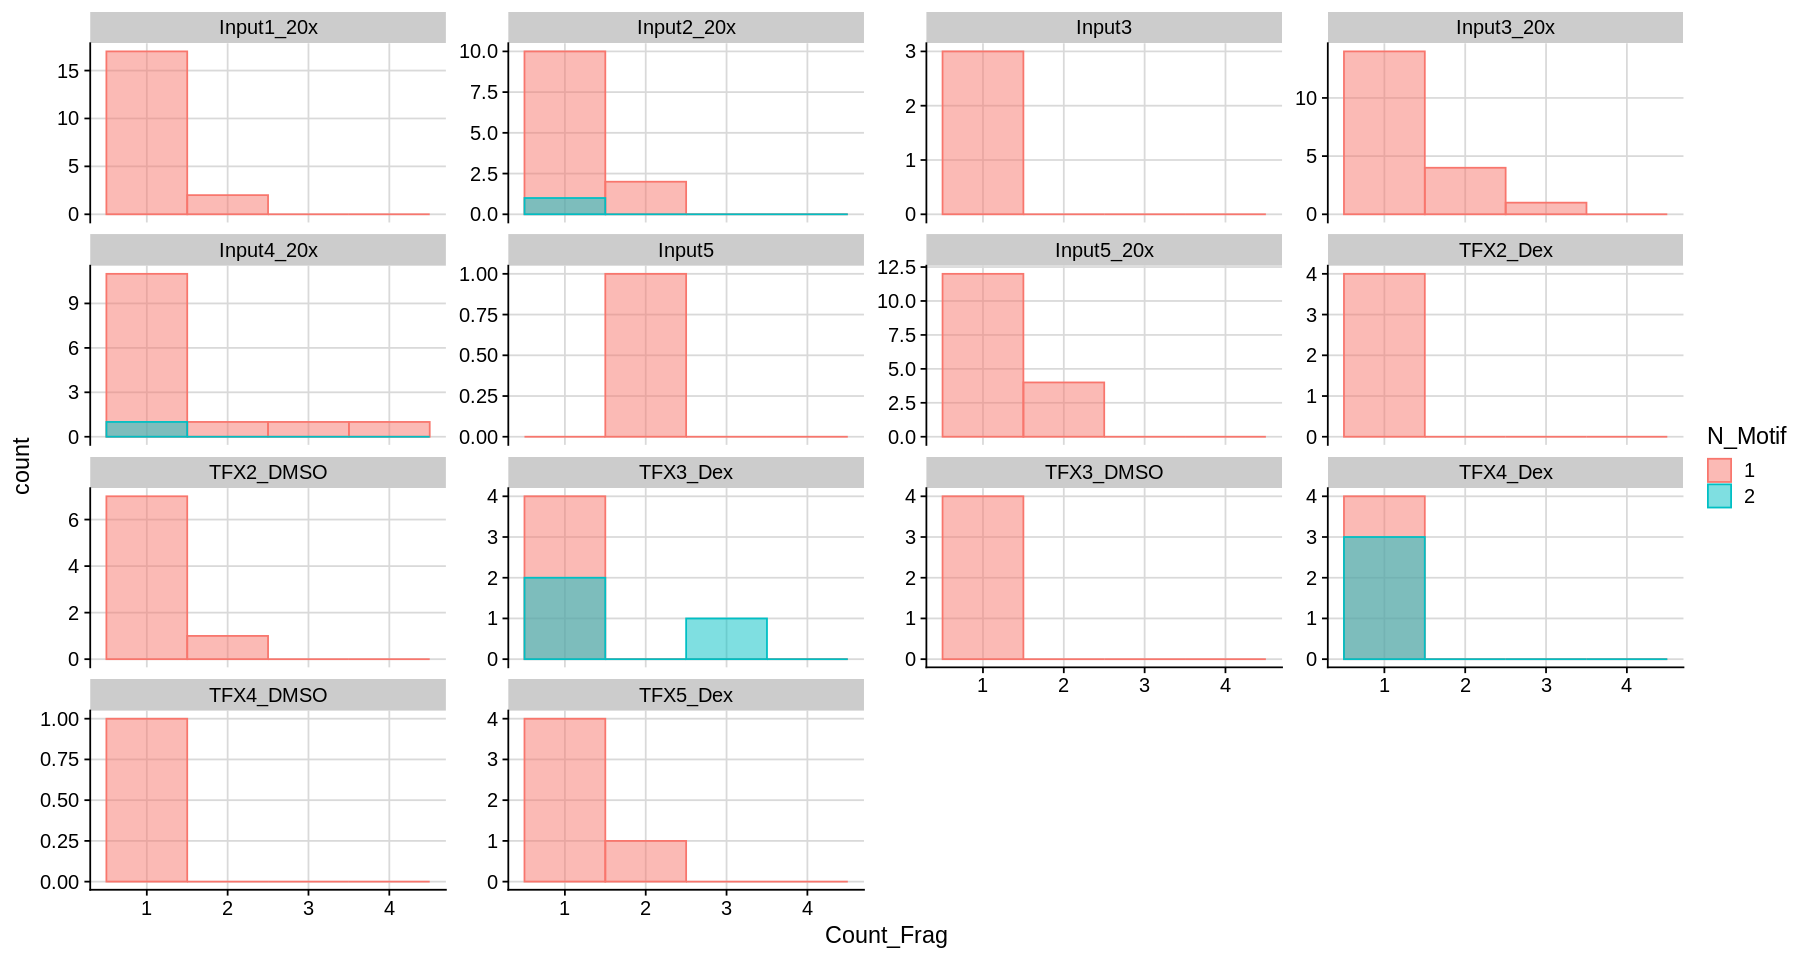

In [25]:
options(repr.plot.height=8, repr.plot.width=15)
tmp = dat %>% mutate(N_Motif = as.character(N_Motif))
gpt = ggplot(tmp, aes(x=Count_Frag, group=N_Motif, color=N_Motif, fill=N_Motif)) + 
    geom_histogram(binwidth=1, alpha=0.5, position = 'identity') +
    #scale_y_log10() +
    #expand_limits(y=0) +
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Sample, scale="free_y")
print(gpt)

## Set up linear model

In [26]:
### Helper function
### https://win-vector.com/2014/05/30/trimming-the-fat-from-glm-models-in-r/
stripGlmLR = function(cm) {
  cm$y = c()
  cm$model = c()
  
  cm$residuals = c()
  cm$fitted.values = c()
  cm$effects = c()
  cm$qr$qr = c()  
  cm$linear.predictors = c()
  cm$weights = c()
  cm$prior.weights = c()
  cm$data = c()

  cm$family$variance = c()
  cm$family$dev.resids = c()
  cm$family$aic = c()
  cm$family$validmu = c()
  cm$family$simulate = c()
  attr(cm$terms,".Environment") = c()
  attr(cm$formula,".Environment") = c()
  
  return(cm)
}

In [27]:
### set samples
SAMPLES0 = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES1 = c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES2 = c(
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [28]:
fdiry = file.path(FD_RES, "model_linear")
dir(fdiry)

[1] "example"                         "fit_interactive_target_PER1.rds"
 [3] "fit_marginal_target_PER1.rds"    "res_interactive_chr17.rds"      
 [5] "res_interactive_chr17.tsv"       "res_interactive_chr20.rds"      
 [7] "res_interactive_chr20.tsv"       "res_interactive_chr21.rds"      
 [9] "res_interactive_chr21.tsv"       "res_interactive_chr22.rds"      
[11] "res_interactive_chrX.rds"        "res_interactive_chrX.tsv"       
[13] "res_interactive_chrY.rds"        "res_interactive_target_PER1.rds"
[15] "res_marginal_chr13.rds"          "res_marginal_chr14.rds"         
[17] "res_marginal_chr15.rds"          "res_marginal_chr17.rds"         
[19] "res_marginal_chr17.tsv"          "res_marginal_chr18.rds"         
[21] "res_marginal_chr20.rds"          "res_marginal_chr20.tsv"         
[23] "res_marginal_chr21.rds"          "res_marginal_chr21.tsv"         
[25] "res_marginal_chr4.rds"           "res_marginal_chrX.rds"          
[27] "res_marginal_chrX.tsv"           "res_marginal_chrY.rds"          
[29] "target_PER1"

In [32]:
SAMPLES = SAMPLES1
FD_OUT  = "marginal_filter95"

In [ ]:
SAMPLES = SAMPLES2
FD_OUT  = "marginal_filter95_input20x"


In [30]:
head(lst_frag[[1]])

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,Sample,N_Motif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
chrY,3607139,3608051,1,AP1/1,TFX5_DMSO,1
chrY,3960670,3961677,1,AP1/1,Input2_20x,1
chrY,3960689,3961704,1,AP1/1,TFX2_Dex,1
chrY,4998521,4999579,1,AP1/1,Input3_20x,1
chrY,4998521,4999580,1,AP1/1,Input1_20x,1
chrY,4998521,4999580,1,AP1/1,Input3_20x,1


In [ ]:
names(lst_frag)

In [37]:
idn = "ATF/2"
mtf   = str_replace(idn, pattern = "/", replacement = "_")
print(mtf)

[1] "ATF_2"


In [43]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

lst_tmp = lst_frag #head(lst_frag, 10)
lst_tmp = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    #require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and reduce the memory size
    fit = lm(y ~ X + 0)
    fit = stripGlmLR(fit)
    
    ### arrange
    #lst = list()
    #lst[[idn]] = list()
    #lst[[idn]]$fit = fit
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst = list()
    lst$fit = fit
    lst$cnt = dat
    lst$X   = X
    lst$y   = y
    
    ### store the results
    mtf   = str_replace_all(idn, pattern = "/", replacement = "_")
    fdiry = file.path(FD_RES, "model_linear", FD_OUT, CHROM)
    fname = paste0("motif_", mtf, ".RDS")
    fpath = file.path(fdiry, fname)
    
    #print(c(idn, mtf)); flush.console()
    dir.create(fdiry, recursive = TRUE, showWarnings = FALSE)
    saveRDS(lst, fpath)
    #idn
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

Done!
Time difference of 7.65693 secs


In [46]:
### start
registerDoParallel(20)
timer_start = Sys.time()

lst_tmp = lst_frag #head(lst_frag, 10)
lst_tmp = foreach(idn = names(lst_tmp)) %dopar% {
    ### set environment
    #require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and reduce the memory size
    fit = lm(y ~ X + 0)
    fit = stripGlmLR(fit)
    
    ### arrange
    #lst = list()
    #lst[[idn]] = list()
    #lst[[idn]]$fit = fit
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst = list()
    lst$fit = fit
    lst$cnt = dat
    lst$X   = X
    lst$y   = y
    
    ### store the results
    mtf   = str_replace_all(idn, pattern = "/", replacement = "_")
    fdiry = file.path(FD_RES, "model_linear", FD_OUT, CHROM)
    fname = paste0("motif_", mtf, ".RDS")
    fpath = file.path(fdiry, fname)
    
    #print(c(idn, mtf)); flush.console()
    dir.create(fdiry, recursive = TRUE, showWarnings = FALSE)
    saveRDS(lst, fpath)
    #idn
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

Done!
Time difference of 7.413731 secs
